In [1]:
import sys

sys.path.append("../")

from bunkatopics import Bunka
from bunkatopics.functions.clean_text import clean_tweet
from langchain.embeddings import HuggingFaceEmbeddings
import random
from datasets import load_dataset
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
abs(-2)

2

In [3]:
dataset = load_dataset("rguo123/trump_tweets")["train"]
full_docs = dataset["content"]
full_docs = random.sample(full_docs, 3000)
full_docs = [clean_tweet(x) for x in full_docs]
full_docs = [x for x in full_docs if len(x)>50]

In [4]:
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
bunka = Bunka(embedding_model=embedding_model)

Chose a Generative AI Model

INFO      |2023-10-07 20:49:38|{}|fit|Extracting Terms
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
100%|███████████████████████████████████████████████████████████| 2426/2426 [00:14<00:00, 163.98it/s]
INFO      |2023-10-07 20:49:53|{}|fit|Embedding Documents, this may take few minutes
INFO      |2023-10-07 20:50:00|{}|fit|Reducing Dimensions
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use

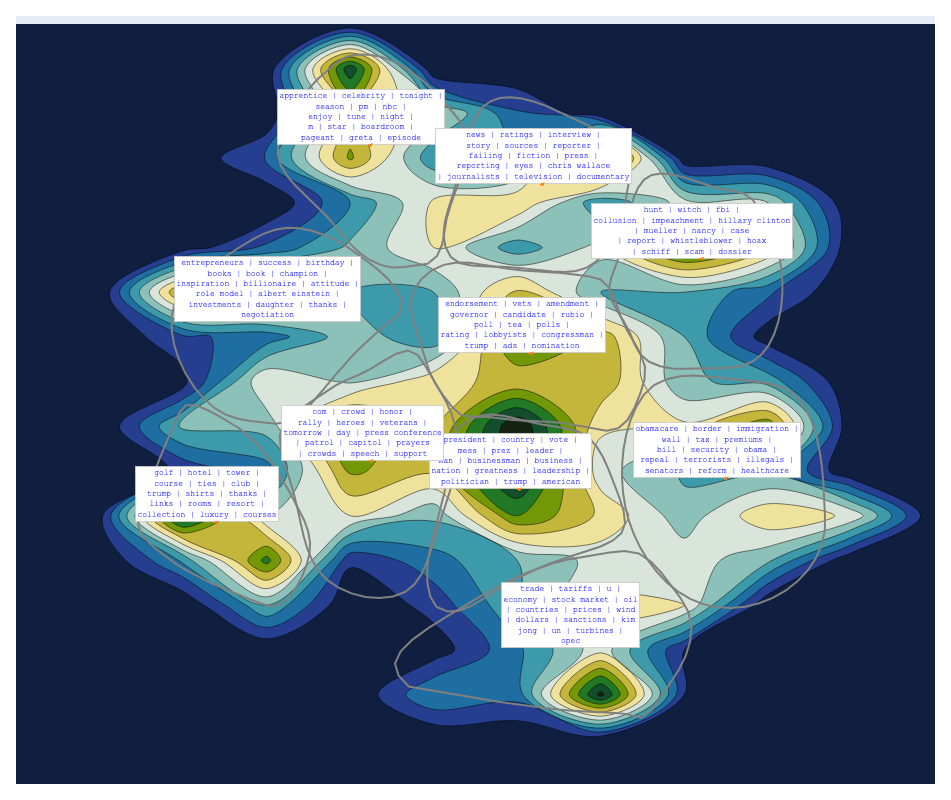

In [5]:
bunka.fit(full_docs)

# Topic Modeling
df_topics = bunka.get_topics(n_clusters=10)
topic_fig = bunka.visualize_topics(width=800, height=800)
topic_fig.show()

Chose a Generative AI Model

In [6]:
from langchain.llms import OpenAI
open_ai_generative_model = OpenAI(openai_api_key = os.getenv('OPEN_AI_KEY'))

from langchain.llms import LlamaCpp
generative_model = LlamaCpp(
    model_path=os.getenv("MODEL_PATH"),
    n_ctx=2048,
    temperature=0.75,
    max_tokens=2000,
    top_p=1,
    verbose=False,
)
generative_model.client.verbose = False

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /Users/charlesdedampierre/Desktop/llama.cpp/models/Mistral/ggml-model-q4_0.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_0     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q4_0     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q4_0     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q4_0     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q4_0     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_gate.weight q4_0     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.ffn_up.weight q4_0     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    7:            blk.0.ffn

In [7]:
# Topic Modeling Clean
df_topics = bunka.get_clean_topic_name(generative_model=open_ai_generative_model)
topic_fig_clean = bunka.visualize_topics(width=800, height=800)
#topic_fig_clean.show()

Creating new labels for clusters: 100%|██████████████████████████████| 10/10 [00:04<00:00,  2.33it/s]


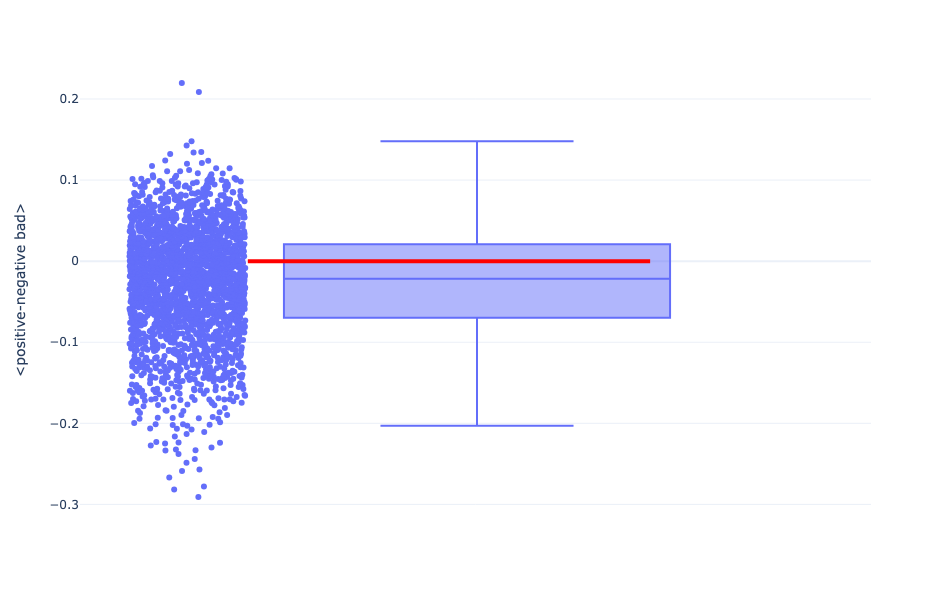

In [8]:
fig_solo = bunka.visualize_bourdieu_one_dimension(
    left=["negative", "bad"],
    right=["positive"],
    width=600,
    height=600,
    explainer=False,
)

fig_solo.show()

In [9]:
manual_axis_name = {
                    'x_left_name':'positive',
                    'x_right_name':'negative',
                   'y_top_name':'women',
                    'y_bottom_name':'men',
                    }

bourdieu_fig = bunka.visualize_bourdieu(
    generative_model=open_ai_generative_model,
    x_left_words=["this is a positive content"],
    x_right_words=["this is a negative content"],
    y_top_words=["this is about women"],
    y_bottom_words=["this is about men"],
    height=1000,
    width=1000,
    label_size_ratio_label=50,
    display_percent=True,
    clustering=True,
    topic_n_clusters=18,
    topic_terms=5,
    topic_top_terms_overall=500,
    topic_gen_name=True,
    convex_hull = True,
    radius_size = 0.5,
    manual_axis_name = manual_axis_name
)


Creating new labels for clusters: 100%|██████████████████████████████| 18/18 [00:08<00:00,  2.17it/s]


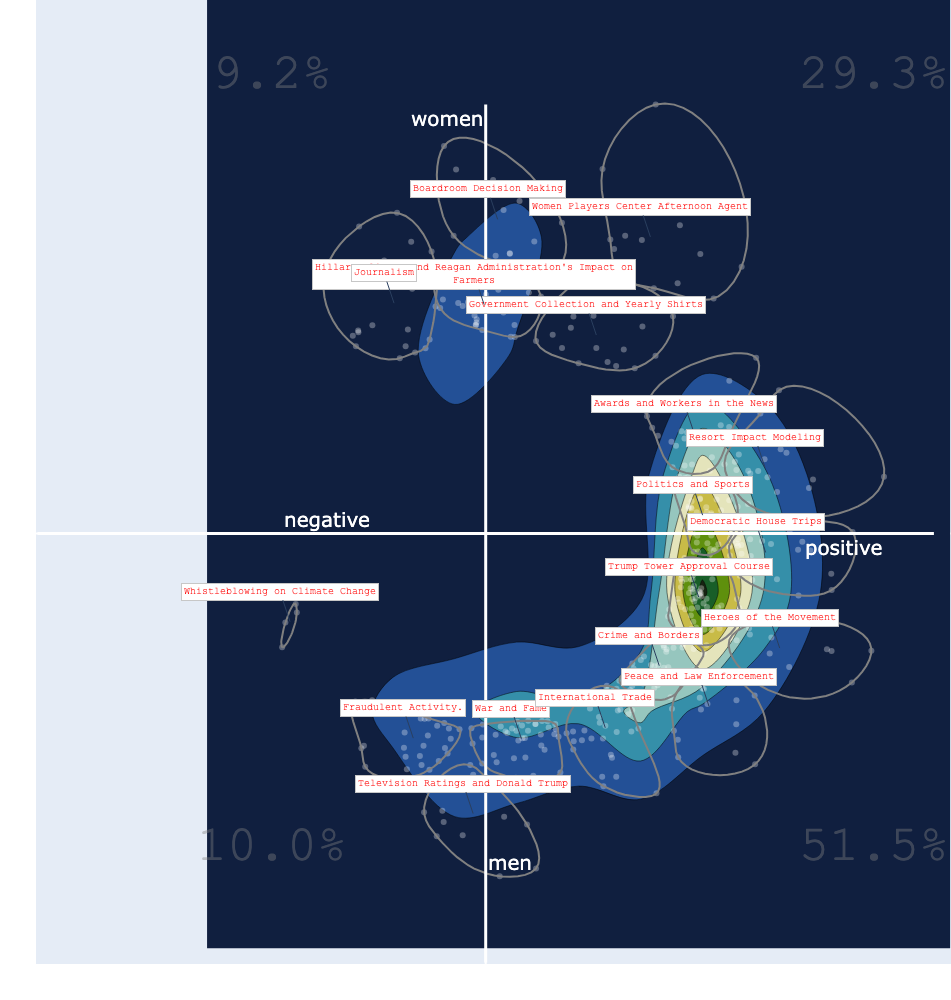

In [10]:
bourdieu_fig.show()

In [11]:
res = bunka.rag_query(query = 'Who is Donald Trump', generative_model = generative_model, top_doc = 5)

INFO      |2023-10-07 20:50:26|{}|rag_query|Answering your query, please wait a few seconds


In [12]:
print(res['result'])

 Donald Trump is a businessman and television personality who served as the 45th President of the United States from 2017 to 2021. He is known for his blunt and direct communication style, often without political correctness or nuance.


In [13]:
for doc in res['source_documents']:
    text = doc.page_content.strip()
    print(text)

president donald j trump sounds great but what do you think mr trump
everyone loves donald because he ll tell it like it is without any political  sugar coating    double speak
donald  stick to business and politics   i will
20 reasons why it should be donald trump in 2016    wow  so nice
we need the real donald trump to run for president
